In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io
from scipy import stats
from statsmodels import robust
%matplotlib inline

In [5]:
datos = pd.read_csv("https://raw.githubusercontent.com/flozambrano/datos-apple/main/2020_CL_Region_Mobility_Report.csv")

In [6]:
datos.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-15,2.0,4.0,9.0,0.0,-3.0,0.0
1,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-16,3.0,5.0,5.0,4.0,-1.0,0.0
2,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-17,1.0,6.0,11.0,-3.0,-8.0,1.0
3,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-18,0.0,5.0,13.0,-3.0,-7.0,1.0
4,CL,Chile,NaN,NaN,NaN,NaN,NaN,ChIJL68lBEHFYpYRHbkCERPhBQU,2020-02-19,0.0,8.0,11.0,-3.0,-7.0,1.0


In [7]:
datos = datos.drop(["metro_area", "iso_3166_2_code", "census_fips_code", "place_id", "country_region_code"], axis = 1)

In [8]:
datos = datos.dropna()

In [9]:
datos['Fecha'] = pd.to_datetime(datos['date']) 
#arreglar formato fecha

In [11]:
rm = datos[datos["sub_region_1"] == "Santiago Metropolitan Region"]
#dejar solo region metropolitana que es lo que piden

In [12]:
rm.head()

,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Fecha
16729,Chile,Santiago Metropolitan Region,Chacabuco Province,2020-02-15,-8.0,-7.0,-8.0,10.0,-2.0,0.0,2020-02-15
16731,Chile,Santiago Metropolitan Region,Chacabuco Province,2020-02-17,-3.0,-1.0,-3.0,1.0,-8.0,2.0,2020-02-17
16732,Chile,Santiago Metropolitan Region,Chacabuco Province,2020-02-18,-3.0,-4.0,-4.0,-11.0,-6.0,1.0,2020-02-18
16733,Chile,Santiago Metropolitan Region,Chacabuco Province,2020-02-19,-6.0,-4.0,-6.0,-11.0,-6.0,2.0,2020-02-19
16734,Chile,Santiago Metropolitan Region,Chacabuco Province,2020-02-20,-4.0,-2.0,-5.0,5.0,-6.0,2.0,2020-02-20


In [13]:
lugar = rm["parks_percent_change_from_baseline"].max()

In [36]:
lugar

94.0

In [37]:
lugarmax = rm[rm["parks_percent_change_from_baseline"] == 94]

In [38]:
lugarmax

,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Fecha
17042,Chile,Santiago Metropolitan Region,Chacabuco Province,2020-12-24,-4.0,35.0,94.0,-19.0,-22.0,14.0,2020-12-24


In [39]:
#ahora hay que hacer lo de las tareas anteriores para tener los datos de la cuarentena 
df = pd.read_csv('https://github.com/MinCiencia/Datos-COVID19/blob/master/input/Paso_a_paso/paso_a_paso.csv?raw=true', sep=',')

In [40]:
df = df.drop(["codigo_comuna", "zona"], axis = 1)

In [41]:
df = df.dropna()

In [42]:
df = df[df["codigo_region"] == 13]
#para dejar solo la region metropolitana

In [43]:
df = pd.melt(df, id_vars = ['codigo_region','region_residencia',"comuna_residencia"], var_name = 'Fecha', value_name = "Fase")

In [44]:
df.head()

,codigo_region,region_residencia,comuna_residencia,Fecha,Fase
0,13,Metropolitana,Alhué,2020-07-28,3
1,13,Metropolitana,Buin,2020-07-28,1
2,13,Metropolitana,Calera de Tango,2020-07-28,1
3,13,Metropolitana,Cerrillos,2020-07-28,1
4,13,Metropolitana,Cerro Navia,2020-07-28,1


In [45]:
df['fecha'] = pd.to_datetime(df['Fecha'])
#cambiar formato fecha

In [46]:
df = df.drop(["Fecha"], axis = 1)

In [47]:
df = df[df["Fase"] == 1]
#dejar solo fase 1 osea cuando estan en cuarentena

In [48]:
mix = pd.merge(left=df , right = datos , how='left' , left_on = 'fecha', right_on='Fecha')

In [49]:
mix.head()

,codigo_region,region_residencia,comuna_residencia,Fase,fecha,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Fecha
0,13,Metropolitana,Buin,1,2020-07-28,Chile,Antofagasta,Antofagasta Province,2020-07-28,-65.0,-51.0,-64.0,-49.0,-42.0,23.0,2020-07-28
1,13,Metropolitana,Buin,1,2020-07-28,Chile,Antofagasta,El Loa,2020-07-28,-65.0,-52.0,-68.0,-71.0,-40.0,23.0,2020-07-28
2,13,Metropolitana,Buin,1,2020-07-28,Chile,Araucania,Cautín Province,2020-07-28,-52.0,-39.0,-60.0,-54.0,-30.0,19.0,2020-07-28
3,13,Metropolitana,Buin,1,2020-07-28,Chile,Araucania,Malleco Province,2020-07-28,-46.0,-24.0,-41.0,-46.0,-21.0,19.0,2020-07-28
4,13,Metropolitana,Buin,1,2020-07-28,Chile,Arica y Parinacota,Arica Province,2020-07-28,-68.0,-44.0,-76.0,-51.0,-43.0,24.0,2020-07-28


In [50]:
mix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57579 entries, 0 to 57578
Data columns (total 16 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   codigo_region                                       57579 non-null  int64         
 1   region_residencia                                   57579 non-null  object        
 2   comuna_residencia                                   57579 non-null  object        
 3   Fase                                                57579 non-null  int64         
 4   fecha                                               57579 non-null  datetime64[ns]
 5   country_region                                      52923 non-null  object        
 6   sub_region_1                                        52923 non-null  object        
 7   sub_region_2                                        52923 non-null  object        
 8   date  

In [51]:
mix = mix.dropna()

In [52]:
mix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52923 entries, 0 to 52922
Data columns (total 16 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   codigo_region                                       52923 non-null  int64         
 1   region_residencia                                   52923 non-null  object        
 2   comuna_residencia                                   52923 non-null  object        
 3   Fase                                                52923 non-null  int64         
 4   fecha                                               52923 non-null  datetime64[ns]
 5   country_region                                      52923 non-null  object        
 6   sub_region_1                                        52923 non-null  object        
 7   sub_region_2                                        52923 non-null  object        
 8   date  

In [53]:
mix = mix[mix["sub_region_1"] == "Santiago Metropolitan Region"]
#para dejar solo region metropolitana pq ahi sale antofagasta araucania y etc

In [54]:
lugarmax1 = mix["parks_percent_change_from_baseline"].max()

In [55]:
lugarmax1

62.0

In [56]:
lugarmax2 = mix[mix["parks_percent_change_from_baseline"] == 62]

In [57]:
lugarmax2

,codigo_region,region_residencia,comuna_residencia,Fase,fecha,country_region,sub_region_1,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Fecha
47396,13,Metropolitana,Buin,1,2020-09-17,Chile,Santiago Metropolitan Region,Chacabuco Province,2020-09-17,-3.0,26.0,62.0,16.0,-32.0,17.0,2020-09-17
47435,13,Metropolitana,Cerro Navia,1,2020-09-17,Chile,Santiago Metropolitan Region,Chacabuco Province,2020-09-17,-3.0,26.0,62.0,16.0,-32.0,17.0,2020-09-17
47474,13,Metropolitana,Conchalí,1,2020-09-17,Chile,Santiago Metropolitan Region,Chacabuco Province,2020-09-17,-3.0,26.0,62.0,16.0,-32.0,17.0,2020-09-17
47513,13,Metropolitana,El Bosque,1,2020-09-17,Chile,Santiago Metropolitan Region,Chacabuco Province,2020-09-17,-3.0,26.0,62.0,16.0,-32.0,17.0,2020-09-17
47552,13,Metropolitana,Independencia,1,2020-09-17,Chile,Santiago Metropolitan Region,Chacabuco Province,2020-09-17,-3.0,26.0,62.0,16.0,-32.0,17.0,2020-09-17
47591,13,Metropolitana,La Pintana,1,2020-09-17,Chile,Santiago Metropolitan Region,Chacabuco Province,2020-09-17,-3.0,26.0,62.0,16.0,-32.0,17.0,2020-09-17
47630,13,Metropolitana,Lo Espejo,1,2020-09-17,Chile,Santiago Metropolitan Region,Chacabuco Province,2020-09-17,-3.0,26.0,62.0,16.0,-32.0,17.0,2020-09-17
47669,13,Metropolitana,Lo Prado,1,2020-09-17,Chile,Santiago Metropolitan Region,Chacabuco Province,2020-09-17,-3.0,26.0,62.0,16.0,-32.0,17.0,2020-09-17
47708,13,Metropolitana,Paine,1,2020-09-17,Chile,Santiago Metropolitan Region,Chacabuco Province,2020-09-17,-3.0,26.0,62.0,16.0,-32.0,17.0,2020-09-17
47747,13,Metropolitana,Pudahuel,1,2020-09-17,Chile,Santiago Metropolitan Region,Chacabuco Province,2020-09-17,-3.0,26.0,62.0,16.0,-32.0,17.0,2020-09-17


In [58]:
grafico = np.unique([[62], [94]], return_counts = True)

In [59]:
grafico

(array([62, 94]), array([1, 1], dtype=int64))

In [65]:
x = ["visitas de parques en cuarentena", "visitas de parques en No cuarentena"]

[Text(0.5, 0, ''), Text(0, 0.5, '%')]

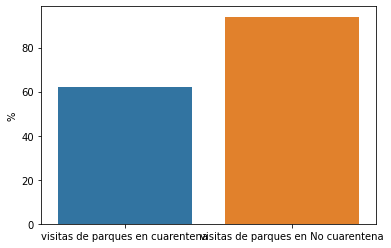

In [66]:
graficoreal = sns.barplot(x= x, y = grafico[0])
graficoreal.set(xlabel = "", ylabel= "%")

In [74]:
#ahora hare el si se va en auto  o caminando 
apple = pd.read_csv("https://raw.githubusercontent.com/flozambrano/datos-apple/main/applemobilitytrends-2021-12-05%20(1).csv")

C:\Users\Florencia\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [75]:
apple

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,181.39,175.75,180.37,166.94,152.35,151.20,141.39,163.52,172.67,162.12
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,200.72,195.78,159.66,164.26,181.32,224.26,210.36,215.39,214.93,156.72
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,131.87,141.64,77.77,86.90,93.26,100.08,104.56,135.03,146.15,91.97
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,121.46,114.41,55.37,89.50,94.21,99.95,103.63,125.52,123.87,71.43
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,132.88,109.25,116.27,120.49,128.27,130.51,135.67,143.79,113.66,121.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,county,York County,walking,NaN,Pennsylvania,United States,100.0,110.22,121.82,109.72,...,219.56,227.24,164.75,184.97,200.06,200.28,204.75,242.15,245.19,157.62
4687,county,Young County,driving,NaN,Texas,United States,100.0,98.85,97.76,92.21,...,255.76,171.82,194.17,147.09,160.43,133.94,163.62,270.80,177.71,133.40
4688,county,Yuba County,driving,NaN,California,United States,100.0,102.98,103.10,114.08,...,153.90,160.91,142.14,161.02,160.95,170.27,164.70,201.53,190.09,132.93
4689,county,Yuma County,driving,NaN,Arizona,United States,100.0,101.82,106.67,108.93,...,179.38,187.79,179.51,149.77,146.23,149.87,149.14,179.34,158.87,125.10


In [76]:
apple.drop('geo_type', axis=1, inplace=True)
apple.drop('alternative_name', axis=1, inplace=True)
apple.drop('region', axis=1, inplace=True)

In [77]:
apple

,transportation_type,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,...,2021-11-26,2021-11-27,2021-11-28,2021-11-29,2021-11-30,2021-12-01,2021-12-02,2021-12-03,2021-12-04,2021-12-05
0,driving,NaN,NaN,100.0,95.30,101.43,97.20,103.55,112.67,104.83,...,181.39,175.75,180.37,166.94,152.35,151.20,141.39,163.52,172.67,162.12
1,walking,NaN,NaN,100.0,100.68,98.93,98.46,100.85,100.13,82.13,...,200.72,195.78,159.66,164.26,181.32,224.26,210.36,215.39,214.93,156.72
2,driving,NaN,NaN,100.0,97.07,102.45,111.21,118.45,124.01,95.44,...,131.87,141.64,77.77,86.90,93.26,100.08,104.56,135.03,146.15,91.97
3,walking,NaN,NaN,100.0,95.11,101.37,112.67,116.72,114.14,84.54,...,121.46,114.41,55.37,89.50,94.21,99.95,103.63,125.52,123.87,71.43
4,driving,NaN,NaN,100.0,102.98,104.21,108.63,109.08,89.00,99.35,...,132.88,109.25,116.27,120.49,128.27,130.51,135.67,143.79,113.66,121.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,walking,Pennsylvania,United States,100.0,110.22,121.82,109.72,140.72,102.87,117.24,...,219.56,227.24,164.75,184.97,200.06,200.28,204.75,242.15,245.19,157.62
4687,driving,Texas,United States,100.0,98.85,97.76,92.21,115.79,128.73,92.48,...,255.76,171.82,194.17,147.09,160.43,133.94,163.62,270.80,177.71,133.40
4688,driving,California,United States,100.0,102.98,103.10,114.08,118.83,121.49,93.29,...,153.90,160.91,142.14,161.02,160.95,170.27,164.70,201.53,190.09,132.93
4689,driving,Arizona,United States,100.0,101.82,106.67,108.93,135.92,124.77,92.88,...,179.38,187.79,179.51,149.77,146.23,149.87,149.14,179.34,158.87,125.10


In [78]:
applerm = apple[apple["sub-region"]== "Santiago Metropolitan Region"]
#para dejar solo la region metropolitana

In [79]:
apple1 = applerm.melt(id_vars=["transportation_type","sub-region", "country"], var_name="Fecha", value_name="Indice")

In [80]:
apple1['Fecha'] = pd.to_datetime(apple1['Fecha'])

In [81]:
df

,codigo_region,region_residencia,comuna_residencia,Fase,fecha
1,13,Metropolitana,Buin,1,2020-07-28
2,13,Metropolitana,Calera de Tango,1,2020-07-28
3,13,Metropolitana,Cerrillos,1,2020-07-28
4,13,Metropolitana,Cerro Navia,1,2020-07-28
6,13,Metropolitana,Conchalí,1,2020-07-28
...,...,...,...,...,...
18892,13,Metropolitana,María Pinto,1,2021-07-06
18921,13,Metropolitana,Buin,1,2021-07-07
18927,13,Metropolitana,Curacaví,1,2021-07-07
18928,13,Metropolitana,Curacaví,1,2021-07-07


In [82]:
final = pd.merge(left = df, right = apple1, how ='left', left_on = 'fecha', right_on='Fecha')

In [83]:
mixfinal = final[final["sub-region"]== "Santiago Metropolitan Region"]

In [84]:
caminando = mixfinal[mixfinal["transportation_type"]== "walking"]
#los que se movieron caminando

In [85]:
caminando['Indice'].max()

101.99

In [87]:
caminandomax = caminando[caminando["Indice"]== 101.99]

In [88]:
caminandomax = caminandomax.drop_duplicates()

In [89]:
caminandomax

,codigo_region,region_residencia,comuna_residencia,Fase,fecha,transportation_type,sub-region,country,Fecha,Indice
10575,13,Metropolitana,Buin,1,2021-06-11,walking,Santiago Metropolitan Region,Chile,2021-06-11,101.99
10577,13,Metropolitana,Calera de Tango,1,2021-06-11,walking,Santiago Metropolitan Region,Chile,2021-06-11,101.99
10579,13,Metropolitana,Cerrillos,1,2021-06-11,walking,Santiago Metropolitan Region,Chile,2021-06-11,101.99
10581,13,Metropolitana,Cerro Navia,1,2021-06-11,walking,Santiago Metropolitan Region,Chile,2021-06-11,101.99
10583,13,Metropolitana,Colina,1,2021-06-11,walking,Santiago Metropolitan Region,Chile,2021-06-11,101.99
10585,13,Metropolitana,Conchalí,1,2021-06-11,walking,Santiago Metropolitan Region,Chile,2021-06-11,101.99
10587,13,Metropolitana,Curacaví,1,2021-06-11,walking,Santiago Metropolitan Region,Chile,2021-06-11,101.99
10591,13,Metropolitana,El Bosque,1,2021-06-11,walking,Santiago Metropolitan Region,Chile,2021-06-11,101.99
10593,13,Metropolitana,El Monte,1,2021-06-11,walking,Santiago Metropolitan Region,Chile,2021-06-11,101.99
10595,13,Metropolitana,Estación Central,1,2021-06-11,walking,Santiago Metropolitan Region,Chile,2021-06-11,101.99


In [91]:
manejando = mixfinal[mixfinal["transportation_type"]== "driving"]
#los que se movieron manejando

In [92]:
manejando['Indice'].max()

122.59

In [93]:
manejandomax = manejando[manejando["Indice"]== 122.59]

In [94]:
manejandomax = manejandomax.drop_duplicates()

In [95]:
manejandomax

,codigo_region,region_residencia,comuna_residencia,Fase,fecha,transportation_type,sub-region,country,Fecha,Indice
10574,13,Metropolitana,Buin,1,2021-06-11,driving,Santiago Metropolitan Region,Chile,2021-06-11,122.59
10576,13,Metropolitana,Calera de Tango,1,2021-06-11,driving,Santiago Metropolitan Region,Chile,2021-06-11,122.59
10578,13,Metropolitana,Cerrillos,1,2021-06-11,driving,Santiago Metropolitan Region,Chile,2021-06-11,122.59
10580,13,Metropolitana,Cerro Navia,1,2021-06-11,driving,Santiago Metropolitan Region,Chile,2021-06-11,122.59
10582,13,Metropolitana,Colina,1,2021-06-11,driving,Santiago Metropolitan Region,Chile,2021-06-11,122.59
10584,13,Metropolitana,Conchalí,1,2021-06-11,driving,Santiago Metropolitan Region,Chile,2021-06-11,122.59
10586,13,Metropolitana,Curacaví,1,2021-06-11,driving,Santiago Metropolitan Region,Chile,2021-06-11,122.59
10590,13,Metropolitana,El Bosque,1,2021-06-11,driving,Santiago Metropolitan Region,Chile,2021-06-11,122.59
10592,13,Metropolitana,El Monte,1,2021-06-11,driving,Santiago Metropolitan Region,Chile,2021-06-11,122.59
10594,13,Metropolitana,Estación Central,1,2021-06-11,driving,Santiago Metropolitan Region,Chile,2021-06-11,122.59


In [96]:
graficacion = np.unique([[101.99], [122.59]], return_counts = True)

In [97]:
y = ["% caminando", "% manejando"]

In [98]:
graficacion

(array([101.99, 122.59]), array([1, 1], dtype=int64))

[Text(0.5, 0, ''), Text(0, 0.5, '%')]

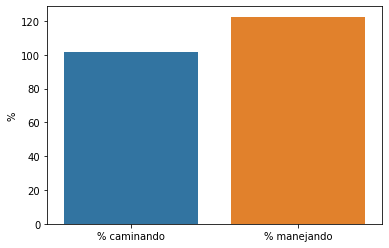

In [99]:
graficoapple = sns.barplot(x= y, y = graficacion[0])
graficoapple.set(xlabel = "", ylabel= "%")